# SOK-1006 V25

## Forelesning 7 - Velferdseffekter av økonomisk politikk under fullkommen konkurranse (Kap 9)

#### 1. Forutsetninger for fullkommen konkurranse

- Det omsettes private goder i markedet uten eksterne virkninger.
- Det er et stort antall tilbydere og etterspørere, og ingen kan påvirke prisen.
- Produsenter fremstiller identiske produkter. Konsumenten er likegyldig hvem de kjøper hos.
- Aktørene i markedet er økonomisk rasjonelle (maksimering av fortjeneste og nytte).
- Full informasjon.
- Prisen er bestemt i samspill mellom tilbud og etterspørsel.
- Markedsdeltakere kan fritt gå inn eller ut av markedet.


#### 2. Likevekt under fullkommen konkurranse

Vi setter opp tilbud og etterspørsel, finner likevekten, og tegner likevekten i en figur. Dette er likevekt under fullkommen konkurranse, og dette har vi sett på før.


In [1]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def demand(x):
    return (1500/(20+x))
def supply(x):
    return x**2/200

In [3]:
x=sp.symbols('x', real=True, positive=True)
equ=sp.Eq(demand(x),supply(x))
equ

Eq(1500/(x + 20), x**2/200)

In [4]:
x_eq=sp.solve(equ,x)
x_eq

[-20/3 + 10*(-1/2 - sqrt(3)*I/2)*(10*sqrt(2017)/3 + 4042/27)**(1/3) + 40/(9*(-1/2 - sqrt(3)*I/2)*(10*sqrt(2017)/3 + 4042/27)**(1/3)),
 -20/3 + 40/(9*(-1/2 + sqrt(3)*I/2)*(10*sqrt(2017)/3 + 4042/27)**(1/3)) + 10*(-1/2 + sqrt(3)*I/2)*(10*sqrt(2017)/3 + 4042/27)**(1/3),
 -20/3 + 40/(9*(10*sqrt(2017)/3 + 4042/27)**(1/3)) + 10*(10*sqrt(2017)/3 + 4042/27)**(1/3)]

In [5]:
# siste element er eneste som ikke er et imaginært tall
x_eq=float(x_eq[2])
x_eq

60.89684931003215

In [6]:
p_eq=demand(x_eq)
p_eq

18.542131279443815

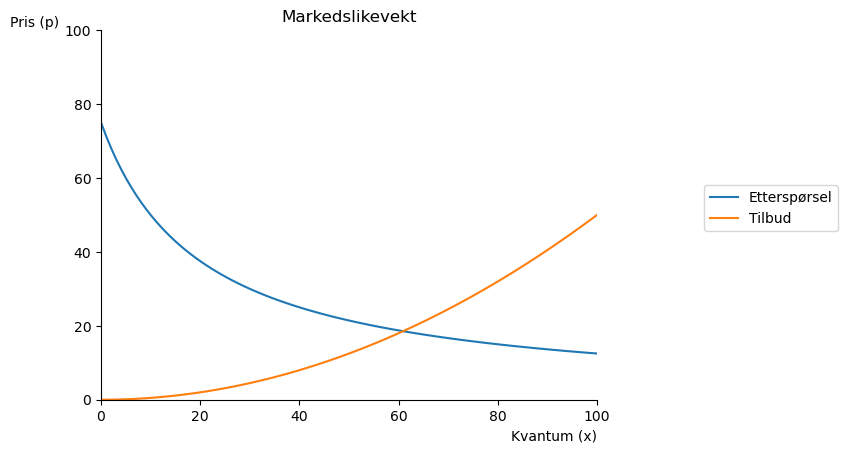

In [7]:
x_num=np.linspace(0.1,100,100)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top', rotation = 0)
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(0,100))
                ax.set(ylim=(0,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonen

ax.plot(x_num, demand(x_num), label='Etterspørsel')
ax.plot(x_num, supply(x_num), label='Tilbud')



# tittel
ax.set_title('Markedslikevekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

La oss tegne inn likevektspris og -kvantum.

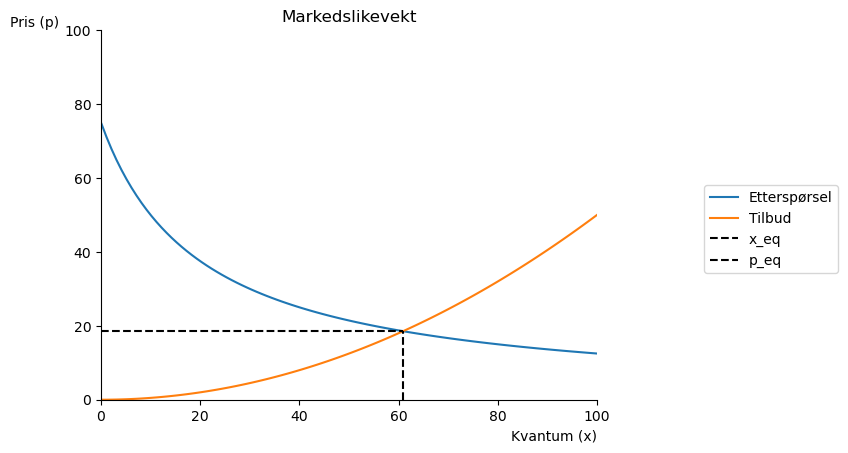

In [8]:
q = np.linspace(0,x_eq,100)

ax.vlines(x_eq,0,demand(x_eq), color='black',ls='dashed', label='x_eq')
ax.hlines(p_eq,0,x_eq, color='black',ls='dashed', label='p_eq')
ax.legend(bbox_to_anchor=(1.5,0.6))
fig

Den vertikale avstanden mellom etterspørselskurven og likevektsprisen er forskjellen i hva konsumenter er villig til å betale for hver ekstra enhet og hva de faktisk må betale. Dette er et overskudd til konsumenten, og kan summeres over alle enheter kjøpt. Dette gir oss **konsumentoverskuddet** som det grønne området nedenfor.      

Den vertikale avstanden mellom likevektsprisen og tilbudskurven viser et overskudd for produsentene ettersom tilbudskurven angir deres grensekostnad. Det røde området i figuren nedenfor angir **produsentoverskuddet**. Både KO og PO er målt i pengeenheter, og summen utgjør samfunnsøkonomisk overskudd (SO = KO+PO).

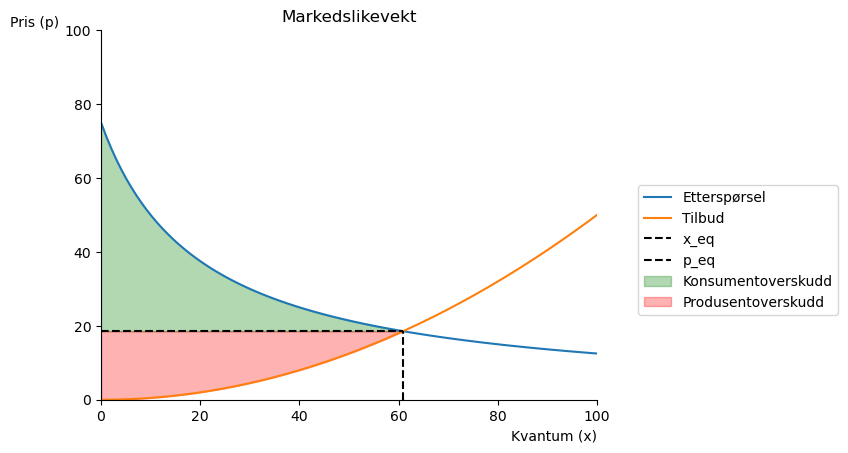

In [9]:

ax.fill_between(q,p_eq,demand(q), color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(q,supply(q),p_eq, color = "red",alpha = 0.3,label='Produsentoverskudd')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig

Markedslikevekten gir størst mulig samfunnsøkonomisk overskudd (se forelesning for bevis).

Vi kan beregne KO og PO ved hjelp av *integrasjon*.

In [10]:
producer_surplus=sp.integrate(p_eq-supply(x),(x,0,x_eq))
producer_surplus

752.771582940749

In [11]:
consumer_surplus=sp.integrate(demand(x)-p_eq,(x,0,x_eq))
consumer_surplus

967.006531985176

In [12]:
welfare_surplus=float(sp.integrate(demand(x)-supply(x),(x,0,x_eq)))
welfare_surplus

1719.7781149259245

Vi oppsummerer i en tabell:

In [13]:
from IPython.display import Markdown

tbl=f"""
|                     | Verdi (kr)                                    |
| :-------------------| :----------------------------------------:|
| Solgt mengde:      | ${np.round(float(x_eq),2)}$           |
| Pris:               | ${np.round(float(p_eq),2)}$              |
| Konsumentoverskudd: | ${np.round(float(consumer_surplus),2)}$ | 
| Produsentoverskudd: | ${np.round(float(producer_surplus),2)}$ | 
| Samfunnsøkonomisk overskudd:    | ${np.round(float(welfare_surplus),2)}$   | 
"""
display(Markdown(tbl))


|                     | Verdi (kr)                                    |
| :-------------------| :----------------------------------------:|
| Solgt mengde:      | $60.9$           |
| Pris:               | $18.54$              |
| Konsumentoverskudd: | $967.01$ | 
| Produsentoverskudd: | $752.77$ | 
| Samfunnsøkonomisk overskudd:    | $1719.78$   | 



### 3. Effekt av en subsidie 

Her skal vi se på virkningen av å subsidiere en vare en per enhet omsatt. Vi skal bruke samme eksempel som i forelesning 5, men nå med en subsidie. Etterspørsel er gitt ved


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3p\tag{2}
\end{equation}

Nå skal vi anta at produsenten får en subsidie på 4 kr per enhet omsatt. 

Dersom kjøperen betaler p kr for varen får produsenten p+4 kr per enhet solgt. Da er etterspørsel det samme som i (1) og tilbud blir:   


\begin{equation}
   x^{S}= -100 + 4.3(p+4)\tag{3}
\end{equation}

La oss sette opp våre funksjoner med s som subsidie:

In [ ]:
def x_d(p):
    return 500 - 3.2*p

def x_s(p, s):
    return -100+ 4.3 *(p+s)

In [ ]:
# definer symboler i sympy

x,p,s=sp.symbols('x p s', positive=True, real=True)

# betingelse for likevekt

eq_cond=sp.Eq(x_d(p),x_s(p,s))
eq_cond

In [ ]:
# løs for p
p_eq=sp.solve(eq_cond,p)
p_eq[0]

In [ ]:
# finn tilsvarende kvantum
x_eq=x_s(p_eq[0],s)
x_eq

In [ ]:
# Bruk sp.lambdify for å gjøre om sympy til numpy array

# Likevektspris som funksjon av s

p_eq_fn=sp.lambdify(
    (s), 
    p_eq[0]
)

p_eq_fn(s)

In [ ]:
# Likevektskvantum som funksjon av s

x_eq_fn=sp.lambdify(
    (s), 
    x_eq
)

x_eq_fn(s)

In [ ]:
# med s=4 og s=0
x_0=x_eq_fn(0)
x_4=x_eq_fn(4)
p_0=p_eq_fn(0)
p_4=p_eq_fn(4)

In [ ]:
#vi tegner løsningen

p_num=np.linspace(0.1,300,100)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top', rotation = 0)
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(220,280))
                ax.set(ylim=(70,90))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')
ax.plot(x_s(p_num, 4),p_num, label='Tilbud med subsidie (s=4)')

ax.plot(x_0, p_0, 'o', label = 'likevekt før subsidie')
ax.plot(x_4, p_4, 'o', label = 'likevekt etter subsidie')

# sett inn linjer som viser likevektene


ax.vlines(x_0, 70, p_0, linestyles='dashed')
ax.hlines(p_0, 220, x_0, linestyles='dashed')


ax.vlines(x_4, 70, p_4+4, linestyles='dashed')
ax.hlines(p_4, 220,x_4, linestyles='dashed')
ax.hlines(p_4+4, 200, x_4, linestyles='dashed')

# vis pris og kvantum på aksene

ax.annotate('x_0', xy=(x_0-2,68), annotation_clip=False)
ax.annotate('x_4', xy=(x_4-2,68), annotation_clip=False)
ax.annotate('p_0', xy=(210, p_0), annotation_clip=False)
ax.annotate('p_4+4', xy=(210, p_4+4), annotation_clip=False)
ax.annotate('p_4', xy=(210, p_4), annotation_clip=False)

# sett in bokstaver for å angi områder

text = [
    (230, 83, 'A'),
    (230, 81, 'B'),
    (230, 79, 'C'),
    (230, 77.1, 'D'),
    (230, 75, 'E'),
    (243, 81, 'F'),
    (242, 79, 'G'),
    (248, 80, 'H'),
    (246, 78.5, 'I'),
    (245, 77, 'J')
]

for x, y, letter in text:
    ax.text(x, y, letter, fontsize=10, ha='center', va='center')

# tittel
ax.set_title('Likevekt med en subsidie')

#vis navnene utenfor plottet:

ax.legend(bbox_to_anchor=(1.5,0.6));

Opprinnelig likevekt er (x_0,p_0). Med en subsidie på 4 kr pe enhet er ny omsetning gitt ved x_4. Konsumenter betaler p_4 og produsenter får p_4+4.        
For å beregne samfunnsøkonomisk overskudd kan vi ta summen av konsument- og produsentoverskudd:

In [ ]:
from IPython.display import Markdown

tbl_før=f"""
|   Før subsidie                  |                                     |
| :-------------------| :----------------------------------------:|
| Konsumentoverskudd: | A + B  | 
| Produsentoverskudd: | C + D | 
| Samfunnsøkonomisk overskudd:    | A + B + C + D    | 
"""
display(Markdown(tbl_før))

For å beregne samfunnsøkonomisk overskudd må vi nå ta hensyn til subsidiekostnaden. Samfunnsøkonomisk overskudd blir da KO + PO - Subsidiekostnad:

In [ ]:
tbl_etter=f"""
|   Etter subsidie                  |                                     |
| :-------------------| :----------------------------------------:|
| Konsumentoverskudd: | A + B + C + G + I  | 
| Produsentoverskudd: | C + D + B + F| 
| Subsidiekostnad: | B + C + G + H + I + F |
| Samfunnsøkonomisk overskudd:    | A + B + C + D  - H  | 
"""
display(Markdown(tbl_etter))

Som vi ser reduseres samfunnsøkonomisk overskudd med område H sammenlignet med situasjonen før subsidien. Dette skjer fordi det produseres enheter som samfunnet verdsetter mindre enn det koster å produsere.